# 2. Reconnaissance faciale

In [26]:
from sklearn.datasets import make_blobs
import numpy as np
import sklearn.svm
from matplotlib import pyplot as plt
from mglearn.plot_interactive_tree import plot_tree_partition
from mglearn.plot_2d_separator import plot_2d_separator
from mglearn.tools import discrete_scatter
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [13]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60, data_home="./sk_learn_data")

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']


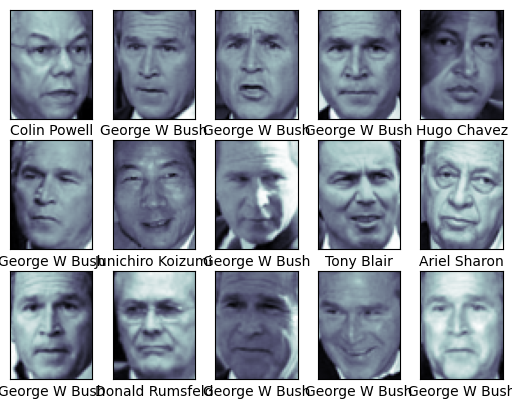

In [14]:
print(faces.target_names)
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
    xlabel=faces.target_names[faces.target[i]])

In [ ]:
from sklearn.decomposition import PCA
# Réduction depuis dimension 2914 à dimension 150
pca = PCA(n_components=150, whiten=True, random_state=42)
X = pca.fit_transform(faces.data)

In [38]:
from sklearn.model_selection import train_test_split

# 20% du jeu de données servira a la vérification 
X_train, X_test, y_train, y_test = train_test_split(X, faces.target, random_state=42, test_size=0.2)

Linéaire 0.7592592592592593
Polynome degré 3 0.362962962962963
Polynome degré 5 0.362962962962963
Polynome degré 10 0.362962962962963
rbf 0.7333333333333333
sigmoid 0.7851851851851852


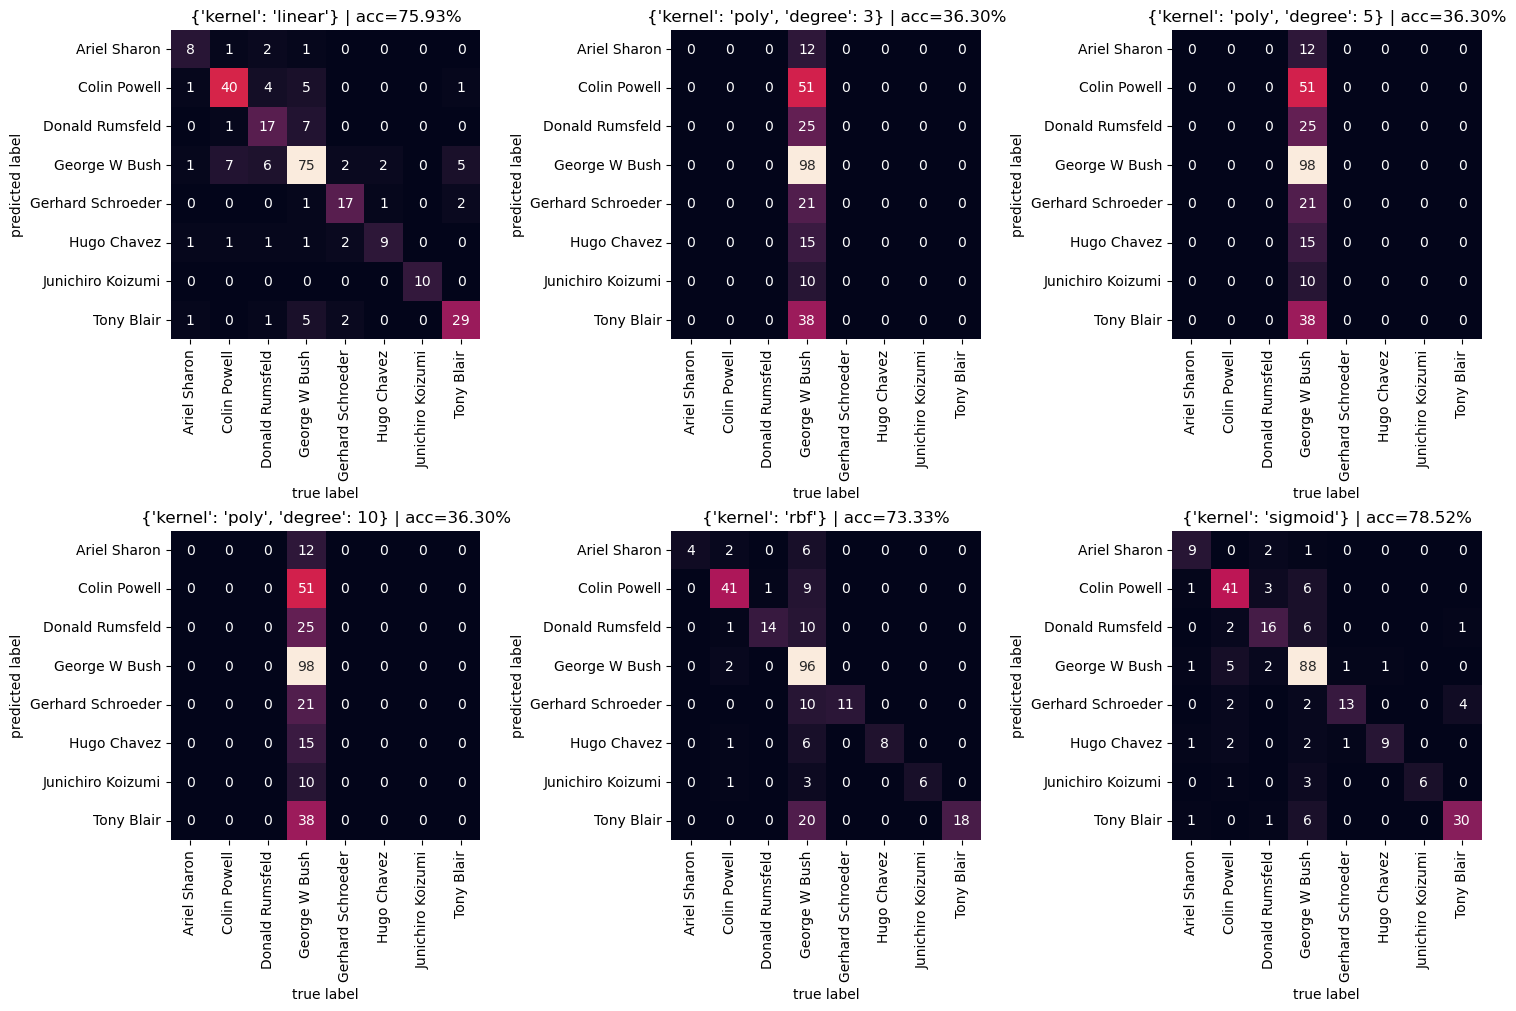

In [ ]:
# Apprentissages de classifieurs SVM
def learn_svc(ax, **params):
    clf = sklearn.svm.SVC(**params)
    clf.fit(X_train, y_train)

    score = clf.score(X_test, y_test)
    
    C = confusion_matrix(y_true=y_test, y_pred=clf.predict(X_test))
    sns.heatmap(C, square=True, annot=True, fmt='d', cbar=False,
        xticklabels=faces.target_names,
        yticklabels=faces.target_names,ax=ax)
    
    ax.set_title(str(params)+ f" | acc={score:.2%}")
    ax.set_xlabel('true label')
    ax.set_ylabel('predicted label')

    return score

fig,ax=plt.subplots(2,3,figsize=(15, 10),constrained_layout=True)
ax=ax.ravel()

print("Linéaire", learn_svc(kernel="linear",ax=ax[0]))
print("Polynome degré 3", learn_svc(kernel="poly", degree=3,ax=ax[1]))
print("Polynome degré 5", learn_svc(kernel="poly", degree=5,ax=ax[2]))
print("Polynome degré 10", learn_svc(kernel="poly", degree=10,ax=ax[3]))
print("rbf", learn_svc(kernel="rbf",ax=ax[4]))
print("sigmoid", learn_svc(kernel="sigmoid",ax=ax[5]))

#fig.tight_layout() 
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(sklearn.svm.SVC(),{'kernel':('linear', 'rbf'), 'C':[1, 10]})
clf.fit(X_test, y_test)

print(clf.cv_results_)

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_C',
 'param_kernel',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']